This Notebook demostrate follwing:
1. Making Piepline
2. Hold out validation
3. K-fold validation
4. Learning curve - diagonising over- and underfitting
5. Validation Curve - addressing over- and uderfitting.

### Designing Pipeline

In [9]:
import pandas as pd

In [10]:
pd.set_option('display.max_columns', 100)

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.loc[:,1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [6]:
df.dtypes

0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
X= df.loc[:,2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)

['B' 'M']


In [9]:
# let's checl the label encoding
le.transform(['M','B'])

array([1, 0])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

_make-pipeline_ function takes an arbitary number of scikit-learn transformers (object that support the fit and transform methods as input), followed by a sckilt-learn estimator that implements the fit and predict methods. 
- We can think of a scikit-learn pipeline as a meta-estimator or wrapper around those individual transformers and estimators. If we call the fit method of pipeline, the data will be passed down as series of transformers via fit and transform call on these intermediate steps until it arrives at the __estimator object(the final element in a pipline). The estimator will then be fitted to the transformed training data.__

- Again, we should note that there is no limit to the number of intermediate steps in a pipeline; however, the last pipeline element __has to be an estimator.__


![pipeline.png](pipeline.png)

In [12]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=3), LogisticRegression(random_state=1))

In [13]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

- Similar to calling _fit_ on a pipeline, pipelines also implement a _predict_ methods. If we feed a dataset to the predict call of a Pipeline object instance, the data will pass thorugh the intermediate steps via transform calls. In the final step, the estimator object will then return a prediciton on the transformed data.

In [14]:
y_pred = pipe_lr.predict(X_test)

In [15]:
pipe_lr.score(X_test, y_test)

0.96491228070175439

### Using K-fold cross-validation to assess model performance

- One of the key steps in building a machine learning model is to estimate its performance on data that the model hasn't seen before.

While training, we know a model can underfit, if the model is too simple, or can overfit if the model is too complex.

- To find an acceptable bias-variance trade-off, we need to evaluate our model carfully. In this section, you will learn about the common cross-valiation techniques __holdout cross-validation__ and __k-fold cross-validation__ which can help us obtain reliable estimated of the model's generalization performance.

### Holdout validation method

![hold_out_validation.png](hold_out_validation.png)

Hold out method for model selection is to separate the data into 3 parts:
1. training data
2. validation data
3. test data

The __training__ data is used to fit the different models, and the performance on the validation set is then used for the model selection. The advantage of having a test set that the model hasn't seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to genralize to new data.


- The above figure illustrates the concept of holdout cross-validation, where we use a validation set to repeatedly evaluate the performance of the model after training using different parameter values. 

- Once we are satisfied with the tuning of hyper-parameter values, we estimate the models' generalization performance on the test dataset.

A __Disadvantage of the holdout method__ is that the performance estimate may be very sensitive to how we partition the training set in the training and validation subsets, the estimate will vary for different samples of the data.

### K-fold cross-validation

In K-fold cross validation we __randomly split the training dataset into _k_ folds without replacements__, where ___k-1_ folds are for model training__, and __one fold is used for performance evaluation.__ 

__This process is repeated k times so that we obtain k model and performance estimates.__

- We then calcuate the average performance of the models based on the differet, independent folds to obtain a perfromance estimate that is less senitive to the sub-partitioning of the training data compared to the holdout methods. Typically, we __use k-fold cross-validation for model tuning, that is, finding the optimal hyperparameter values that yields a satisfying generalization performance.__

- Once we have found the satisfactory hyper parameter values, we can __retrain the model on the training set and obtain a final performance estimate using the independent test set.__

- Since k-fold validation involves resampling technique without replacement, thus each sample point will be used for training and vaidation exactly once, which yields a lower-variance estimate of the model performance than the holdout method.


![k-fold_validation.png](k-fold_validation.png)

- A __good estimate for k in _k-fold_ cross validation is 10__. However __if we are working with small trainging sets, it can be useful to increase the number of folds.__ However large values of _k_ will also increase the runtime of the cross-validation algorithm and yield estimates with higher variance, since the training fold will be more similar to each other. 
- On the other hand, if we are working with __large dataset, we can choose a smaller value for _k_,__ for example _k=5_.

 A slight improvement over the standard k-fold cross validation approach is __stratified k-fold __ cross validaiton, which yields __better bias and variance __ estimates, especially in cases of unequal class proportions.

- In stratified cross-validation, the class proportions are preserved in each fold to ensure that each fold is representative of the class proportions in the training dataset.

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [24]:
kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)

In [25]:
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold %2d, Class dist.: %s, Acc: %.3f' %(k+1, np.bincount(y_train[train]), score))

Fold  1, Class dist.: [256 153], Acc: 0.891
Fold  2, Class dist.: [256 153], Acc: 0.957
Fold  3, Class dist.: [256 153], Acc: 0.978
Fold  4, Class dist.: [256 153], Acc: 0.935
Fold  5, Class dist.: [256 153], Acc: 0.870
Fold  6, Class dist.: [257 153], Acc: 0.956
Fold  7, Class dist.: [257 153], Acc: 0.933
Fold  8, Class dist.: [257 153], Acc: 0.933
Fold  9, Class dist.: [257 153], Acc: 0.978
Fold 10, Class dist.: [257 153], Acc: 0.978


In [28]:
print('\nCV accuracy :%.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


CV accuracy :0.941 +/- 0.035


Although the previous code example was useful to illustrate how k-fold cross-validation works, scikit-learn also implements a k-fold cross validation scorer, which allows us to evaluate our model using stratified k-fold cross-validation less verbosely. 
In _cross-val-score_; if we set the _n_jobs_ parameter to 1, only one CPU will be used to evaluate performance , however by settings the n_jobs =2, we would distribute the 10 rounds of cross-validations to 2 CPUs; and by setting n_jobs=-1 we can use all available CPUs on our machine.

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator= pipe_lr,
                        X= X_train,
                        y= y_train,
                        cv= 10,
                        n_jobs=1)

### Diagnosing bias and variance problems with learning curve

Let's see how we can use the learning curve function from sklearn to evaluate the model

In [32]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import learning_curve


% matplotlib inline

In [8]:
pipe_lr = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2', random_state=1))

In [25]:

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, 
              X= X_train,
              y= y_train,
              train_sizes = np.linspace(0.1,1.0,11),
              cv=12,
              n_jobs=1)

In [26]:
train_scores.shape

(11, 12)

In [29]:
test_scores.shape

(11, 12)

In [28]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



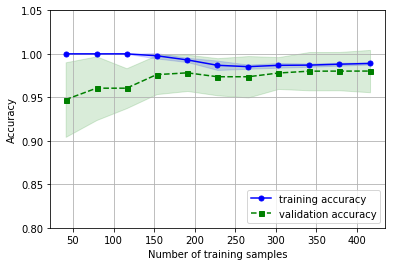

In [41]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.05])
plt.show()

In [30]:
train_sizes

array([ 41,  79, 116, 153, 191, 228, 266, 303, 341, 378, 416])

via the _training_sizes_ parameters in the _learning_curve_ function we can control the absolute or relative number of trainign samples that are used to generate the learning curves. By default the _learning_curve_ function uses stratified k-fold cross-validation to calculate the cross-validation accuracy of a classifier, and we set k=12 via the cv parameter for 2-fold statified cross-validation. Then we simply calucated the average accuracies from the returned cross-validated trining and test scoress for the different sizes of the trainign set, wehich we plotted using Matplotlib's _plot_ funciton. 

- As we can see in the preceding learning curve plot, our model performes quite well on both the training and validation dataset if it has seen more than 250 samples during trainign. We can also see that the training accuracy increases for training sets with fewer than 250 samples, and the gap between validation and training accuracy widens - an indicator of an increasing degree of overfitting.

### Addressing over- and underfitting with validation curves

__Validation curves__ are a __useful tool for improving the performance of a model by adressing issues such as overfitting or underfitting.__ Validation curves are related to learning curves, but instead of plotting training and test accuracies as functions of the sample size, __we vary the values of the model parameters.__

In [42]:
from sklearn.model_selection import validation_curve

In [46]:
param_range = [0.001, 0.01, 0.1, 1.0,10.0, 100.0]
train_scores, test_scores = validation_curve(estimator = pipe_lr,
                               X= X_train,
                               y= y_train,
                                param_name='logisticregression__C',
                                param_range=param_range,
                                cv=10)

In [48]:
train_scores.shape, test_scores.shape

((6, 10), (6, 10))

In [52]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# train_mean.shape

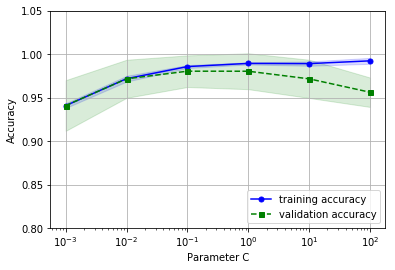

In [53]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s',markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.05])
plt.show()

- Similar, to _learning_curve_ function, the _validation_curve_ function uses stratified k-fold cross-validation by default to estimate the performance of the classifier. Inside the _validation_curve_ function, we specified the parameter that we want to evaluate for a specified value range that we set  via the _param_range_ parameter.

- We can see that the model slightly underfits the data when we increase the regularization strength(small value of C). However, for large values of C, it means lowering the strength of regularization, so the model tends to slightly overfit the data.